PoC - Proof of Concept

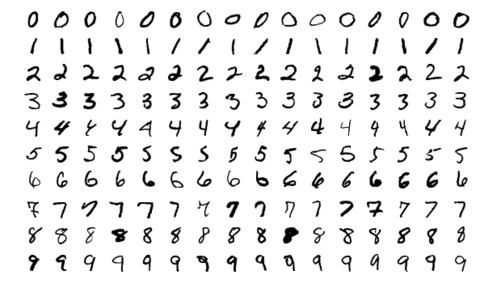

#MNIST Dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full[0]

5

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

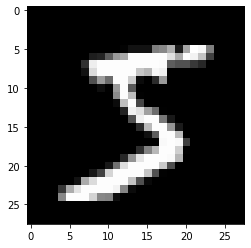

In [ ]:
plt.imshow(img, cmap="gray")

In [ ]:
label = y_train_full[0]
label

5

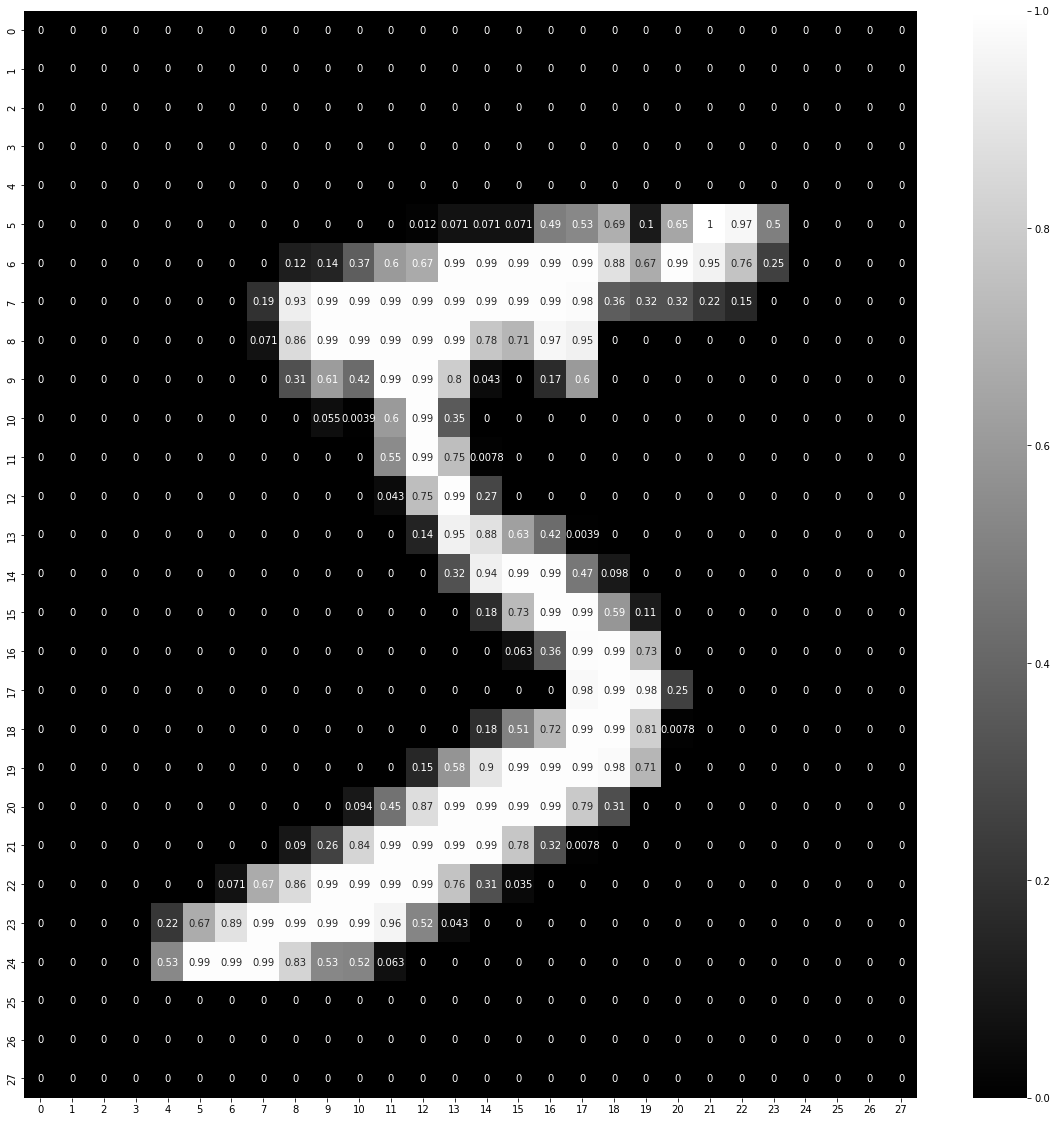

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="gray")

In [ ]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [ ]:
1.5e+2

150.0

In [ ]:
1.5 * 10 ** 2

150.0

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [ ]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
len(np.unique(y_train))

10

In [ ]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [ ]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# weights + biases
784*300 + 300

235500

In [ ]:
300*100 + 100

30100

In [ ]:
100 * 10 + 10

1010

In [ ]:
235500 + 30100 + 1010

266610

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [ ]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2537 - accuracy: 0.9289 - val_loss: 0.2162 - val_accuracy: 0.9386
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2156 - accuracy: 0.9386 - val_loss: 0.1860 - val_accuracy: 0.9480
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1873 - accuracy: 0.9473 - val_loss: 0.1647 - val_accuracy: 0.9564
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1661 - accuracy: 0.9531 - val_loss: 0.1505 - val_accuracy: 0.9612
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1481 - accuracy: 0.9576 - val_loss: 0.1389 - val_accuracy: 0.9632
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1333 - accuracy: 0.9625 - val_loss: 0.1286 - val_accuracy: 0.9662
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1211 - accuracy: 0.9661 - val_loss: 0.1194 - val_accuracy:

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.253678,0.928927,0.216219,0.9386
1,0.215584,0.938636,0.186021,0.9480
2,0.187338,0.947345,0.164736,0.9564
3,0.166116,0.953055,0.150503,0.9612
4,0.148086,0.957618,0.138858,0.9632
5,0.133330,0.962509,0.128618,0.9662
6,0.121096,0.966091,0.119381,0.9684
7,0.110851,0.968600,0.114428,0.9684
8,0.101614,0.970945,0.107600,0.9698
9,0.093905,0.973418,0.101580,0.9732


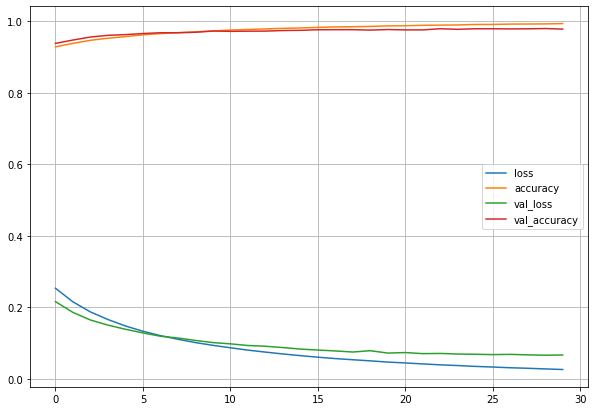

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9780


[0.06987179070711136, 0.9779999852180481]

In [ ]:
10000/32

312.5

In [ ]:
model_clf.save("mnist_full.h5")

In [ ]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
X_new.shape

(3, 28, 28)

In [ ]:
y_prob.shape

(3, 10)

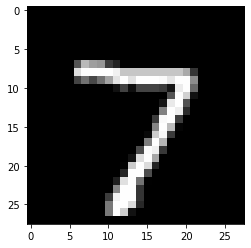

In [ ]:
plt.imshow(X_new[0], cmap="gray")

In [ ]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

In [ ]:
for kohli, dhoni, dravid in zip([1,2,3], [3,2,1], [3,3,3]):
    print(kohli, dhoni, dravid)

1 3 3
2 2 3
3 1 3


In [ ]:
list(zip([1,2,3], [3,2,1], [3,3,3]))

[(1, 3, 3), (2, 2, 3), (3, 1, 3)]

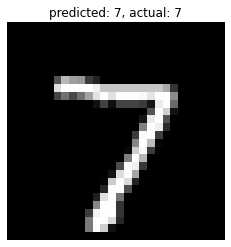

------------------------------------------------------------


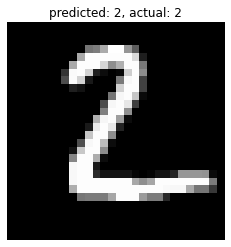

------------------------------------------------------------


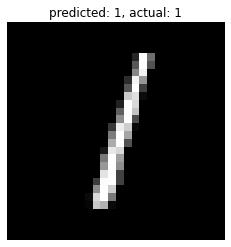

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [ ]:
y_train.shape

(55000,)

In [ ]:
y_train[1]

3


y_train - 

data_points | label
-|-
0|7
1|3

X_train 

data_points | data
-|-
0|(28, 28)
1|(28, 28)
2|(28, 28)
3|(28, 28)


data 

data_points | data | label
-|-| -
0|(28, 28) | 7
1|(28, 28) | 3
2|(28, 28)
3|(28, 28)


# Transfer learning

## New problem statement - 
Classify handwritten digits into odd and even

In [ ]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [ ]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [ ]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [ ]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [ ]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [ ]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [ ]:
100*2 + 2

202

In [ ]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [ ]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [ ]:
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

1 0
2 1
3 0
4 1
5 0


In [ ]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [ ]:
np.unique(y_train_bin)

array([0, 1])

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [ ]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1774 - accuracy: 0.9358 - val_loss: 0.1265 - val_accuracy: 0.9562
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1241 - accuracy: 0.9571 - val_loss: 0.1132 - val_accuracy: 0.9598
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1146 - accuracy: 0.9607 - val_loss: 0.1086 - val_accuracy: 0.9622
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1101 - accuracy: 0.9620 - val_loss: 0.1075 - val_accuracy: 0.9640
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9629 - val_loss: 0.1032 - val_accuracy: 0.9640
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1051 - accuracy: 0.9633 - val_loss: 0.1013 - val_accuracy: 0.9640
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1035 - accuracy: 0.9641 - val_loss: 0.1011 - val_accuracy:

In [ ]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.9645


[0.10517442971467972, 0.9645000100135803]

In [ ]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01]], dtype=float32)

In [ ]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [ ]:
y_test_bin[:3]

array([0, 1, 0])

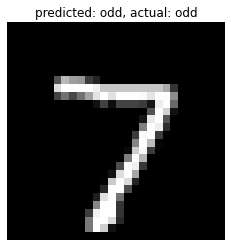

------------------------------------------------------------


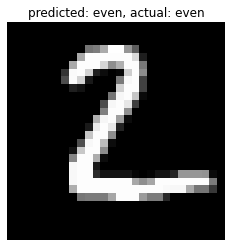

------------------------------------------------------------


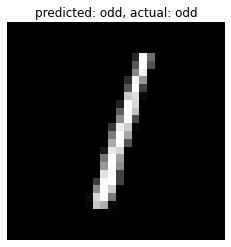

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Train A CNN model on MNIST data

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [ ]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [ ]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [ ]:
np.expand_dims(X_train, 1).shape

(55000, 1, 28, 28)

In [ ]:
np.expand_dims(X_train, 3).shape

(55000, 28, 28, 1)

In [ ]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [ ]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [ ]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
X_train_CNN[0].shape

(28, 28, 1)

In [ ]:
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [ ]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [ ]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
64*5*5

1600

In [ ]:
(3*3*1 + 1) * 32

320

In [ ]:
(28 - 3) // 1 + 1

26

In [ ]:
(26 - 2) // 2 + 1

13

In [ ]:
(3*3*32 + 1) * 64

18496

In [ ]:
1600 * 10 + 10

16010

# Assignment = 

1. Train this model (10 classes)
2. Try Transfer learning by changing the last layer to classify no. as even and odd (2 classes)

Mail your assignment at - 
sunny@ineuron.ai

Subject Line of this email -

**[FSDS-Nov] CNN transfer learning Assignment**

In [ ]:
CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [ ]:
history = CNN_model.fit(
    X_train_CNN, y_train, epochs=30, 
    validation_data = (X_valid_CNN, y_valid)
)

In [ ]:
CNN_model.evaluate(X_test_CNN, y_test)

In [ ]:
CNN_model.save("CNN_model_full.h5")

In [ ]:
pre_trained_CNN_model = tf.keras.models.load_model("CNN_model_full.h5")

In [ ]:
for layer in pre_trained_CNN_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [ ]:
lower_pretrained_CNN_model = pre_trained_CNN_model.layers[:-1]

In [ ]:
new_CNN_model = tf.keras.models.Sequential(lower_pretrained_CNN_model)
new_CNN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [ ]:
new_CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [ ]:
new_CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [ ]:
history = new_CNN_model.fit(
    X_train_CNN, y_train_bin, epochs=30, 
    validation_data = (X_valid_CNN, y_valid_bin)
)

In [ ]:
new_CNN_model.evaluate(X_test_CNN, y_test_bin)